 # 4 累積分布関数

 ## 4.1 PMF の限界
 - PMF は値の個数が増えるとランダムノイズの影響が大きくなる
 - PMF では２つの分布の比較が難しい
 - CDF 累積分布関数 cumulative distribution function
 ## 4.2 パーセンタイル

In [1]:
def PercentileRank(scores, your_score):
    """Compute the percentile rank of a given score
    
    Arguments:
        scores (list) 
        your_score (float) 
    
    Returns:
        float percentile rank
    """
    count =0
    for score in scores:
        if score <= your_score:     
            count += 1
    
    percentile_rank = (100.0 * count) / len(scores)
    return percentile_rank


In [2]:
scores = [55, 66, 77, 88, 99]
percentile_rank = PercentileRank(scores, 88)
print(percentile_rank)


80.0


In [3]:
def Percentile(scores, percentile_rank):
    """Get the percentile value of a given percentil rank.
    
    Arguments:
        scores (list)
        percentile_rank (float) 
    
    Returns:
        float percentile rank
    """
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score


In [4]:
percentile = Percentile(scores, percentile_rank)
print(percentile)


88


In [5]:
def Percentile2(scores, percentile_rank):
    """Get the percentile value of a given percentile rank.
    
    More effective implementation.
    
    Arguments:
        scores (list) 
        percentile_rank (float) 
    
    Returns:
        float percentile value 
    """
    scores.sort()
    index = int(percentile_rank * (len(scores) - 1) / 100)
    return scores[index]


In [6]:
percentile = Percentile2(scores, percentile_rank)
print(percentile)


88


 ## 4.3 累積分布関数（CDF）

In [7]:
def EvalCdf(t, x):
    """ Compute the CDF of given value
    
    Arguments:
        t (list): value sequence
        x (float): value
    
    Returns:
        float CDF
    """
    count = 0.0
    for value in t:
        if value <= x:
            count += 1
    
    prob = count / len(t)
    return prob



In [8]:
t = [1, 2, 2, 3, 5]
for x in range(6): 
    print("CDF({0}) = {1}".format(x, EvalCdf(t, x)))

CDF(0) = 0.0
CDF(1) = 0.2
CDF(2) = 0.6
CDF(3) = 0.8
CDF(4) = 0.8
CDF(5) = 1.0


 ## 4.4 CDF の表現

In [9]:
import thinkstats2
import first
import thinkplot

live , firsts,others = first.MakeFrames() 
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.show(xlabel='weeks', ylabel='CDF')


<Figure size 640x480 with 1 Axes>

In [10]:

print("10% {0} weeks".format(cdf.Value(0.1)))
print("90% {0} weeks".format(cdf.Value(0.9)))


10% 36 weeks
90% 41 weeks


 ## 4.5 CDFを比較する

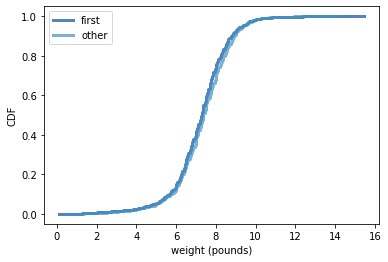

<Figure size 576x432 with 0 Axes>

In [11]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF') 


 ## 4.6 パーセンタイル派生統計量
 - 中央値(median)：50位パーセンタイル値
 - 四分位範囲(interquartile range, IQR)：75位 -　25位パーセンタイル値
 - 分位数(quantiles)：CDFにおいて等間隔で表現される統計量

 ## 4.7 乱数

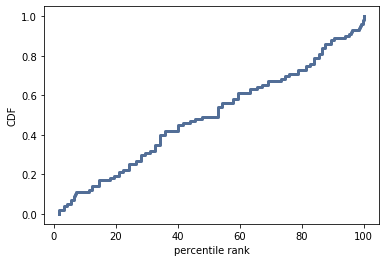

<Figure size 576x432 with 0 Axes>

In [12]:
import numpy as np
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.show(xlabel='percentile rank', ylabel='CDF')


 ## 4.8 パーセンタイル順位を比較する

In [13]:
def PositionToPercentileRank(position, field_size):
    """Compute the percentile rank of a given position
    
    Arguments:
        position (int) 
        field_size (int)
    
    Returns:
        float percentile rank
    """
    beat = field_size - position + 1
    percentile_rank  = (100.0 * beat) / field_size
    return percentile_rank


In [14]:
field_size=256
position = 26
percentile_rank = PositionToPercentileRank(position, field_size)
print(percentile_rank)


90.234375


In [15]:
def PercentileRankToPositon(percentile_rank, field_size):
    """Compute the position of a given percentile_rank
    
    Arguments:
        percentile_rank (float) 
        field_size (int) 
    
    Returns:
        float position
    """
    beat = percentile_rank * field_size / 100.0
    position = field_size - beat + 1
    return position


In [16]:
position = PercentileRankToPositon(percentile_rank, field_size)
print(position)


26.0


In [17]:
new_field_size = 171
new_position = PercentileRankToPositon(percentile_rank, new_field_size)
print(new_position)


17.69921875
